In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import acquire

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_store = acquire.get_store_data()

## Exercises

The end result of this exercise should be a file named `prepare.py`.

Using your store items data:

1. Convert date column to datetime format.  

In [4]:
# strftime method:
# 
# This presents an issue
# df_store.sale_date = pd.to_datetime(df_store.sale_date)
# df_store = df_store.set_index('sale_date')
# df_store.index = df_store.index.strftime('%Y-%m-%d')

In [8]:
df_store.sale_date = pd.to_datetime(df_store.sale_date.apply(lambda x: x[:-13]))

In [9]:
df_store.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


2. Plot the distribution of `sale_amount` and `item_price`.  

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

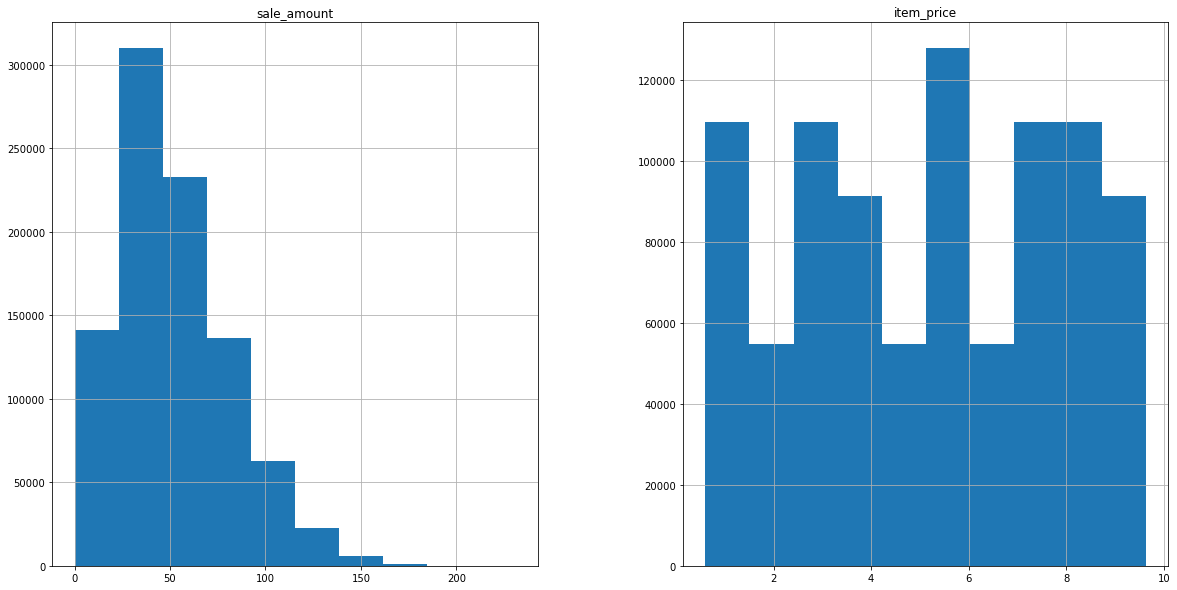

In [10]:
df_store[['sale_amount', 'item_price']].hist(figsize=(20,10))

3. Set the index to be the datetime variable.

In [11]:
df_store = df_store.set_index('sale_date').sort_index()

4. Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df_store['dow'] = df_store.index.day_name()

In [13]:
df_store['month'] = df_store.index.month_name()

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.  

In [14]:
df_store['sales_total'] = df_store['sale_amount'] * df_store['item_price']

In [15]:
df_store.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,dow,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,January,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,Tuesday,January,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,294.00


Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

1. Convert date column to datetime format. 

In [16]:
df = pd.read_csv('opsd_germany_daily.csv', index_col=0)

In [17]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
df['Date'] = pd.to_datetime(df.Date)

2. Plot the distribution of each of your variables.  

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

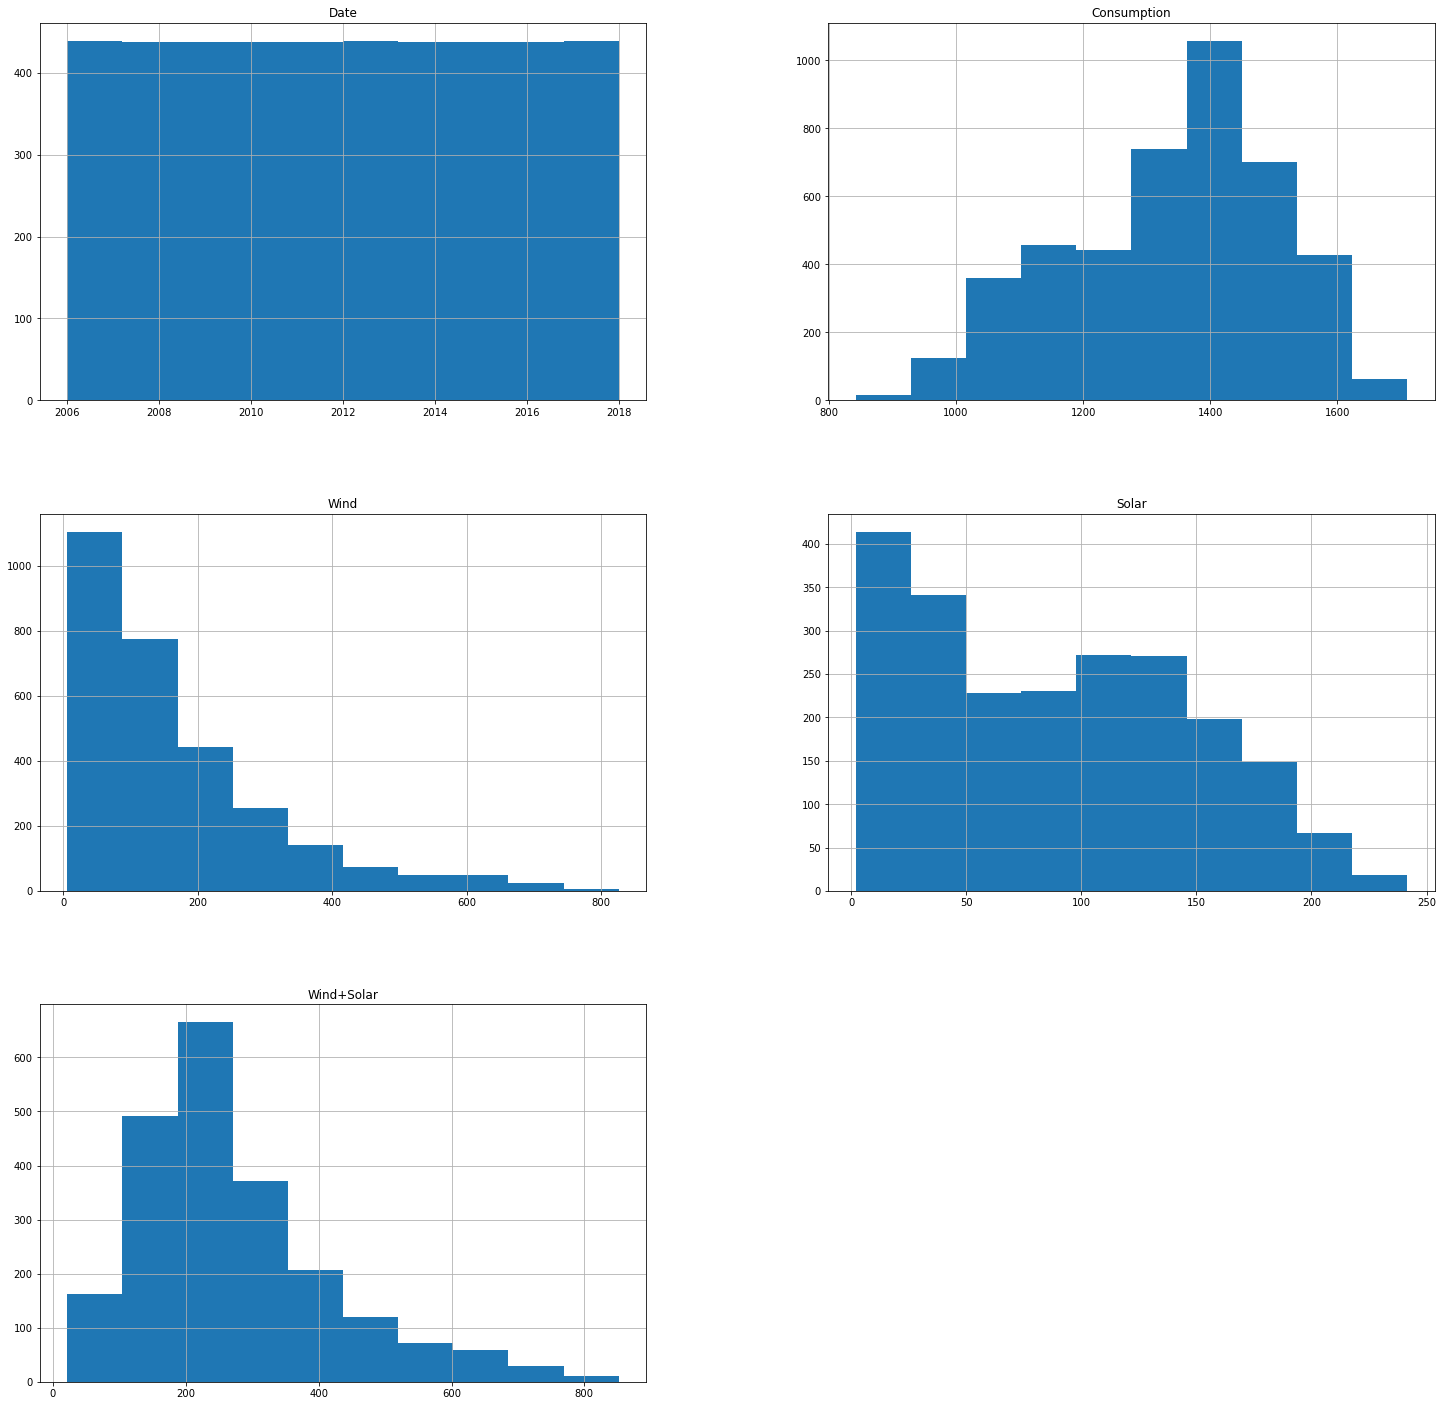

In [19]:
df.hist(figsize=(25,25))

3. Set the index to be the datetime variable.  

In [20]:
df = df.set_index('Date').sort_index()

In [21]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [22]:
df['month'] = df.index.month_name()

In [23]:
df['year'] = df.index.year

5. Fill any missing values.

In [24]:
df.fillna(0, inplace=True)

In [25]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [26]:
df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.37200,48.709,0.000,0.000,January,2010
2010-01-02,1161.04200,24.628,0.000,0.000,January,2010
2010-01-03,1132.06900,22.963,0.000,0.000,January,2010
2010-01-04,1346.25000,59.318,0.000,0.000,January,2010
2010-01-05,1457.37400,41.624,0.000,0.000,January,2010
...,...,...,...,...,...,...
2017-12-26,1130.11683,717.453,30.923,748.376,December,2017
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [27]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [28]:
df.shape

(4383, 6)

In [29]:
df['wind_solar_custm'] = df['Wind'] + df['Solar']

In [30]:
df[df['Wind+Solar'] != (df['Wind'] + df['Solar'])][['Wind', 'Solar', 'Wind+Solar', 'wind_solar_custm']]

,Wind,Solar,Wind+Solar,wind_solar_custm
Date,,,,
2010-01-01,48.709,0.000,0.000,48.709
2010-01-02,24.628,0.000,0.000,24.628
2010-01-03,22.963,0.000,0.000,22.963
2010-01-04,59.318,0.000,0.000,59.318
2010-01-05,41.624,0.000,0.000,41.624
...,...,...,...,...
2017-12-26,717.453,30.923,748.376,748.376
2017-12-27,394.507,16.530,411.037,411.037
2017-12-29,584.277,29.854,614.131,614.131
